In [ ]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import joblib
from utils.data_loader import load_as_maps
from models.unext import build_unext

In [ ]:
# load data
features, targets = load_as_maps(start_year=1958, end_year=2018, datasets=["exp1"])

# split data
X_train = features[:int(0.8 * len(features))]
Y_train = targets[:int(0.8 * len(targets))]
X_val = features[int(0.8 * len(features)):int(0.9 * len(features))]
Y_val = targets[int(0.8 * len(targets)):int(0.9 * len(targets))]
X_test = features[int(0.9 * len(features)):]
Y_test = targets[int(0.9 * len(targets)):]

# scale data
scaler = MinMaxScaler()
n_samples, h, w, n_features = X_train.shape
X_train_flat = X_train.reshape(-1,n_features)
X_train_scaled_flat = scaler.fit_transform(X_train_flat)
X_train = X_train_scaled_flat.reshape(n_samples, h, w, n_features)


n_samples, h, w, n_features = X_val.shape
X_val_flat = X_val.reshape(-1,n_features)
X_val_scaled_flat = scaler.transform(X_val_flat)
X_val = X_val_scaled_flat.reshape(n_samples, h, w, n_features)

n_samples, h, w, n_features = X_test.shape
X_test_flat = X_test.reshape(-1,n_features)
X_test_scaled_flat = scaler.transform(X_test_flat)
X_test = X_test_scaled_flat.reshape(n_samples, h, w, n_features)

# save scaler
timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M')
folder_path = "../../outputs/u-next/" + timestamp
os.makedirs(folder_path, exist_ok=True)

joblib.dump(scaler, folder_path + '/scaler.pkl')

['../../outputs/u-net/2025-09-23_15-21/scaler.pkl']

In [ ]:
lr = 0.001
batch_size = 2


model = build_unext((167, 360, 13))
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=lr), loss='mse', metrics=['mae'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 167, 360,  │          0 │ -                 │
│ (InputLayer)        │ 13)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 168, 360,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 13)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 168, 360,  │      1,888 │ zero_padding2d[0… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 168, 360,  │         64 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 168, 360,  │          0 │ batch_normalizat… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 168, 360,  │      2,320 │ activation[0][0]  │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 168, 360,  │         64 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 168, 360,  │          0 │ batch_normalizat… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 84, 180,   │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 84, 180,   │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 84, 180,   │        128 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 84, 180,   │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 84, 180,   │      9,248 │ activation_2[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 84, 180,   │        128 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 84, 180,   │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 42, 90,    │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 42, 90,    │     18,496 │ max_pooling2d_1[

 Total params: 540,049 (2.06 MB)

 Trainable params: 538,641 (2.05 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [4]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, min_delta=0.0005, restore_best_weights=True)

H, W = 167, 360
mask_ch = 10

if Y_train.ndim == 3: Y_train = Y_train[..., None]
if Y_val.ndim   == 3: Y_val   = Y_val[..., None]

m_train = X_train[..., mask_ch]
m_val   = X_val[..., mask_ch]

history = model.fit(
    X_train,
    Y_train,
    validation_data=(X_val, Y_val, m_val),
    batch_size=batch_size,  
    epochs=5,  
    sample_weight=m_train,
    callbacks=[lr_scheduler, early_stopping],
    shuffle=True
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 58s 278ms/step - loss: 0.3939 - mae: 0.8401 - val_loss: 1.1200 - val_mae: 1.1092 - learning_rate: 0.0010
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 56s 286ms/step - loss: 0.1734 - mae: 0.8149 - val_loss: 0.2474 - val_mae: 0.8803 - learning_rate: 0.0010
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 57s 291ms/step - loss: 0.1398 - mae: 0.8447 - val_loss: 0.2538 - val_mae: 1.0034 - learning_rate: 0.0010
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 57s 291ms/step - loss: 0.1261 - mae: 0.8639 - val_loss: 0.1999 - val_mae: 0.9203 - learning_rate: 0.0010
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 57s 292ms/step - loss: 0.1158 - mae: 0.8667 - val_loss: 0.1584 - val_mae: 0.9067 - learning_rate: 0.0010


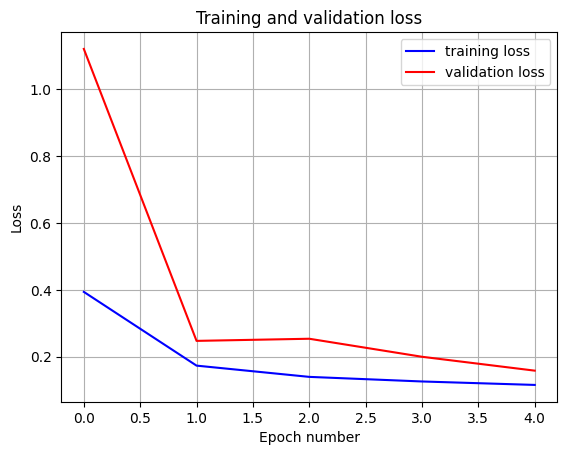

In [5]:
model.save(folder_path + "/model.keras")

plt.plot(history.history['loss'], color = 'blue', label = 'training loss')
plt.plot(history.history['val_loss'], color = 'red', label = 'validation loss')
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.grid(True)
plt.legend()

timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M')
path = folder_path + '/' + timestamp + '_training_validation_loss.png'
plt.savefig(path, format='png', dpi=300)
plt.show()  

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

test_pred = model.predict(X_test)
pred = test_pred.reshape(-1)
truth = Y_test.reshape(-1)

# test_pred = target_scaler.inverse_transform(test_pred)

# computiung mse and mae for ocean points only
mask = X_test.reshape(-1,13)
mask = mask[:, 10] == 1
pred = pred[mask]
truth = truth[mask]

mse = mean_squared_error(pred, truth)
mae = mean_absolute_error(pred, truth)
print(f"Mean Squared Error: {mse:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 466ms/step
Mean Squared Error: 0.242
Mean Absolute Error: 0.331


In [ ]:
from utils.model_analysis import complete_model_analysis_map

complete_model_analysis_map(folder_path,"exp1")


/Users/jakobmeggendorfer/Documents/CAU/Masterarbeit/master-thesis/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ValueError: File not found: filepath=../../outputs/u-net/2025-09-23_14-34/model.keras. Please ensure the file is an accessible `.keras` zip file.